# NOAA Weather Station Data Analysis Recreation
By: Aaron Padilla
Date Start: 5/15/2025
Date Completed: ___

This is conceptually based on a project I did while at my previous job.

Link to Database: https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/
^ This is apparently a legacy application, since replaced by a series of API's and AWS hosting services.
That said, for the sake of familiarity, I'll engineer the data similar to how I did back then, then load it into the notebook.

---

Goal: 

Overall Goal: Provide a proof of concept by gathering critical weather observations contributing to feasibility studies for various clientelle (aviation/aerospace, agriculture, climate research, etc.)

Sample Cities/Weather Stations:

* New York
* Los Angeles
* Tokyo
* Beijing
* Paris
* London


Objectives:

[ ] Display timeseries weather trends at international weather stations (<b><u>line plots</u></b>)

[ ] Take <b><u>Histograms</u></b> of various series parameters within the dataset

    [ ] Wind Speed

    [ ] Gust

    [ ] Precipitation

    etc

--- Further Objectives Listed Below ---


## Initial Data Intake & Engineering

In [11]:
# Initial Library Imports

import pandas as pd
# import matplotlib.axes as ax
import matplotlib.pyplot as plt
# import seaborn as sb
import numpy as np
import itertools 

In [12]:
# Data Intake & Initialization:

# Dictionary of All Weather Stations for this study's major cities indexed by name and station number designation
# Format is:
#
# KEY : [STATION NAME (NOAA), STATION NUMBER (NOAA ADJUSTED)] 
#
# This is meant to be itterable later on. Also helps research with 

locationDict = {
    "New York":"74486094789",
    "Los Angeles":"72295023174", 
    "Tokyo":"47662099999",
    "Beijing":"54511099999",
    "Paris":"71560099999",
    "London":"03772099999"}

# aliasDict = 

# List of the locations matching the keys in the above dictionary just in case I need it to itterate. (THIS IS REDUNDANCY)
locationList = locationDict.keys()

# --------------------------------------------------------------------------------
# For Loops to Assemble Dataframes from File

# What is this intended to do?

# 1) Itterate through a list or dictionary to:
#     a) assemble all dataframes of annualized data
#        I) by location
#       II) from earliest to latest (2020-2025)
#
# "How" would I do that?
#  
# 2) Structure of the loops:
#     a) Instanciate each dataframe as its own variable (as a blank dataframe)
#     b) Grab Keys from a dictionary or the list above
#         I) Have the location keys match the variable designators (for redundancy)
#
#     # This is where the looping starts
#     c) PSEUDOCODE:
#    -----
#    
#    for loc, year in itertools.product(locationList, np.arange(2020, 2026))
#        
#        [locationDataFrame] = pd.concat([locationDataFrame, pd.convert_csv(f"./Weather Data Analysis/{locationList[i]}/{locationsList[i]}/{LocationsList[i]}-{year}-{locationDict[LocationList[i]}.csv"])
#        
#    -----
#     
# Remember, flat is better than nested, but, I'll add: "Separated is is better than integrated if possible"

# --------------------------------------------------------------------------------

# initializing all dataframes to be itterated onto
nyData = pd.DataFrame()
laData = pd.DataFrame()
tokyoData = pd.DataFrame()
beijingData = pd.DataFrame()
parisData = pd.DataFrame()
londonData = pd.DataFrame()

In [13]:
def appendAllYears(df, location):

    # Empties the existing dataframe
    df = pd.DataFrame()
    
    # copying globals to local to speed compile time
    loclocationDict = locationDict

    # for loop which concatenates all weather data into a dataframe across years from earliest to latest by location initialized in the def parameters 
    for year in np.arange(2020, 2026):
       
        df = pd.concat([df, pd.read_csv(f"./Weather Data/{location}/{location.replace(" ", "")}-{year}-{loclocationDict[f"{location}"]}.csv")]).replace(999.9, 0.0)
#                                                                            Location (file directory)/"Location-year-[station number]"
    df['YEAR'] = df.DATE.str[0:4]
    df['MONTH'] = df.DATE.str[6:7]
    df['DAY'] = df.DATE.str[9:10]
    df['MONTH-DAY'] = df.DATE.str[5:]
    df['LOCATION'] = location
    df= df[['LOCATION']+["YEAR"]+['MONTH']+['DAY']+["MONTH-DAY"]+[col for col in list(df.columns)[:-5]]]
    
    return df


In [14]:
# Populating all dataframes with time series data
nyData = appendAllYears(nyData, "New York")
laData = appendAllYears(laData, "Los Angeles")
tokyoData = appendAllYears(tokyoData, "Tokyo")
beijingData = appendAllYears(beijingData, "Beijing")
parisData = appendAllYears(parisData, "Paris")
londonData = appendAllYears(londonData, "London")

# This list of dataframes is meant only for itteration purposes and not for transforming the dataframes themselves.
# Changes made to the values in this list will only affect the values in this list, as they are copies enumerated into this list.
# This is where pointers would be helpful. But I don't want to deal with that right now. 
# Therefore: Do not use the values in this list to transform the data in the dataframes themselves.

itterableLocations = [nyData, laData, tokyoData, beijingData, londonData]

In [15]:
# Sanity check on New York
beijingData.head()

# Features that should not be present:
# 1) Other Location's Data
# 2) Repeat Year Data
# 3) 
# 

# print("Columns: \n")
# for i in np.arange(0, len(nyData.columns)): print(nyData.columns[i])
# print(" /n"+" Unique values for Each Column: ")


,LOCATION,YEAR,MONTH,DAY,MONTH-DAY,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,Beijing,2020,1,1,01-01,54511099999,2020-01-01,40.080111,116.584556,35.35,...,5.8,13.6,33.1,,10.6,,0.00,G,0.0,0
1,Beijing,2020,1,2,01-02,54511099999,2020-01-02,40.080111,116.584556,35.35,...,7.8,17.5,39.6,,13.3,,0.00,G,0.0,0
2,Beijing,2020,1,3,01-03,54511099999,2020-01-03,40.080111,116.584556,35.35,...,7.8,0.0,45.9,,17.6,,0.00,G,0.0,0
3,Beijing,2020,1,4,01-04,54511099999,2020-01-04,40.080111,116.584556,35.35,...,9.7,12.4,50.0,*,17.6,*,0.00,G,0.0,0
4,Beijing,2020,1,5,01-05,54511099999,2020-01-05,40.080111,116.584556,35.35,...,3.9,0.0,49.3,,21.2,,0.19,G,0.0,101000


## Comparing Temperatures Across All Dates Across All Previous Years

The reason the ___ [Finish Note Later]

In [16]:
def compareDateTempsPerYear(df):

    # The following dataframe needs to be one which uses each year as a series, and the MONTH-DAY as an index
    
    plotDf = pd.DataFrame(columns = ['LOCATION']+['MONTH-DAY']+list(df.YEAR.unique()[:-2]))

    # Series.unique() returns a Numpy array, so setting a series values to the unique entries of a series filled with a numpy array gives the uniques.
    # The reason I started the enumeration with "np.delete" is that it would delete a leap year if detected in a dataset
    # Since leap years will complicate matters later on with zero entry rows & retrofitting later on in the script.
    # in a 5 year sample, a leap year should be present. But, I'm putting it in just in case.
    
    if df['MONTH-DAY'].unique()[59] == "02-29":
        # Deletes the leap year from the entries
        plotDf['MONTH-DAY'] = np.delete(df['MONTH-DAY'].unique(), 59)
    else:
        plotDf['MONTH-DAY'] = df['MONTH-DAY'].unique()

    # ^ This initial dataframe works. Now just need to populate it with the below script:
    
    yearSpan = [int(np.sort(df.YEAR.unique())[0]), int(np.sort(df.YEAR.unique())[-1])] # again, taking the 2nd to last latest year, since the current year isn't complete
    
    # Now populating each day entry by year
    for day, year in itertools.product(np.arange(0, len(plotDf['MONTH-DAY'])), np.arange(yearSpan[0], yearSpan[1])): # This loop assumes the years in the input dataframe are ordered chronologically

        # The value at the day/date in a given year (series) is equal to the temperature of the input dataframe where the year and the MONTH-DAY are those input. 
        try:
            plotDf.loc[day, f'{year}'] = df[(df['YEAR'] == str(year)) & (df['MONTH-DAY'] == plotDf['MONTH-DAY'].iloc[day])].TEMP.iloc[0]

        # The Tokyo Data had (a) missing day(s), so I did a try-except clause to fill null values for that slot.
        except IndexError:
            np.NaN

    plotDf['LOCATION'] = df.LOCATION.iloc[0]

    # If something messes with the script and the dataframe doesn't come out the same, comment out the rest of the code and see if the Df comes out right
    # by running this return, which displays the dataframe.
    # return plotDf

    # --------------------------------------------------
    # Drawing the Figure:
    
    # now to draw the lineplots. Setting the figure size and plotting each series with a loop.
    plt.figure(figsize = [15,10])
    for i in np.arange(2, len(plotDf.columns)):
        plt.plot(plotDf['MONTH-DAY'], plotDf[f"{plotDf.columns[i]}"])

    # setting tick marks for the beginning of each month, corresponding to an integer label and month abbreviation
    ticks = plotDf[(plotDf['MONTH-DAY'].str[3:] == '01')]['MONTH-DAY']
    labels = ['1\nJan','2\nFeb','3\nMar','4\nApr','5\nMay','6\nJun','7\nJul','8\nAug','9\nSep','10\nOct','11\nNov', '12\nDec']
    # Plotting those ticks with their labels
    plt.xticks(ticks, labels)

    plt.xlabel("Month", size = "12")
    plt.ylabel("Degrees (Farenheit)", size = "12")
    plt.legend(plotDf.columns[2:])
    plt.title(f"Temperatures in {plotDf.LOCATION.iloc[0]} between {yearSpan[0]} and {yearSpan[1]-1}")
    plt.show()

    

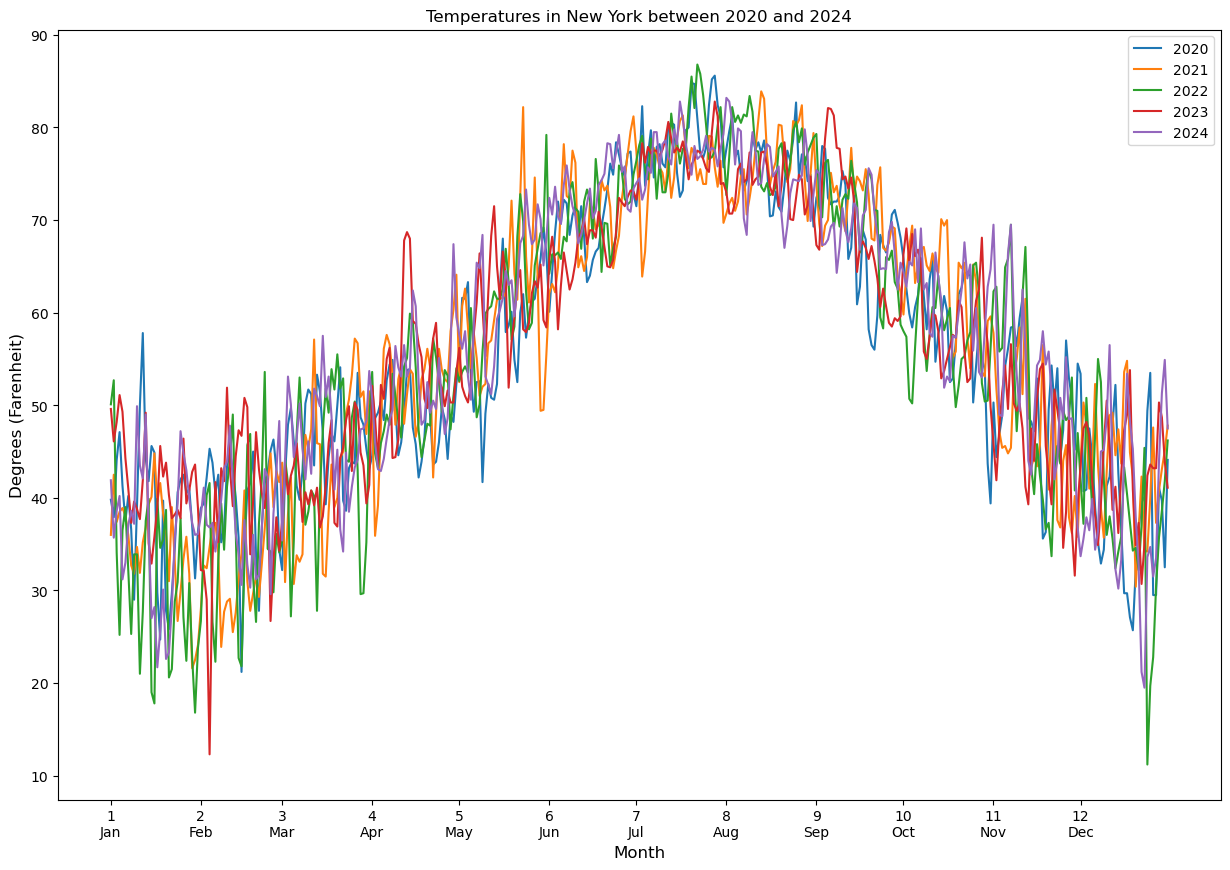

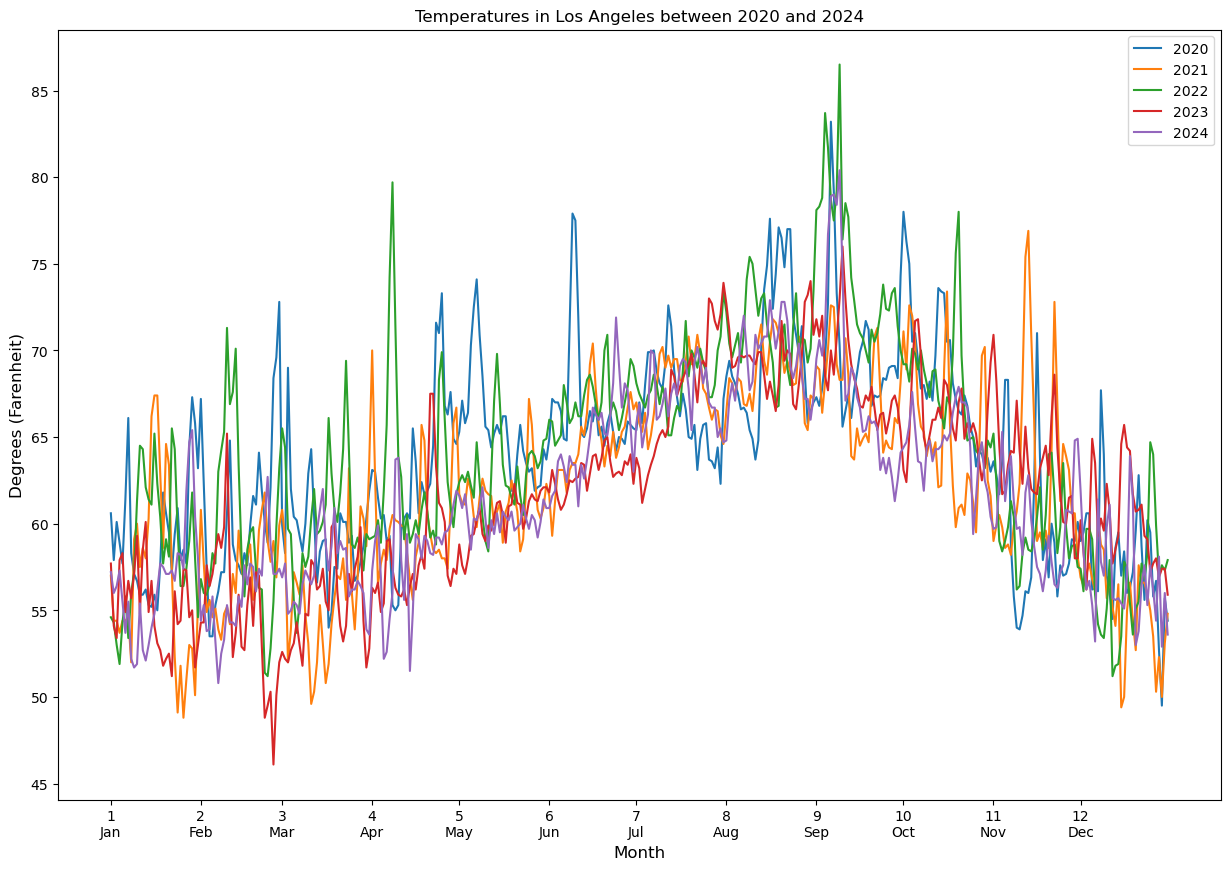

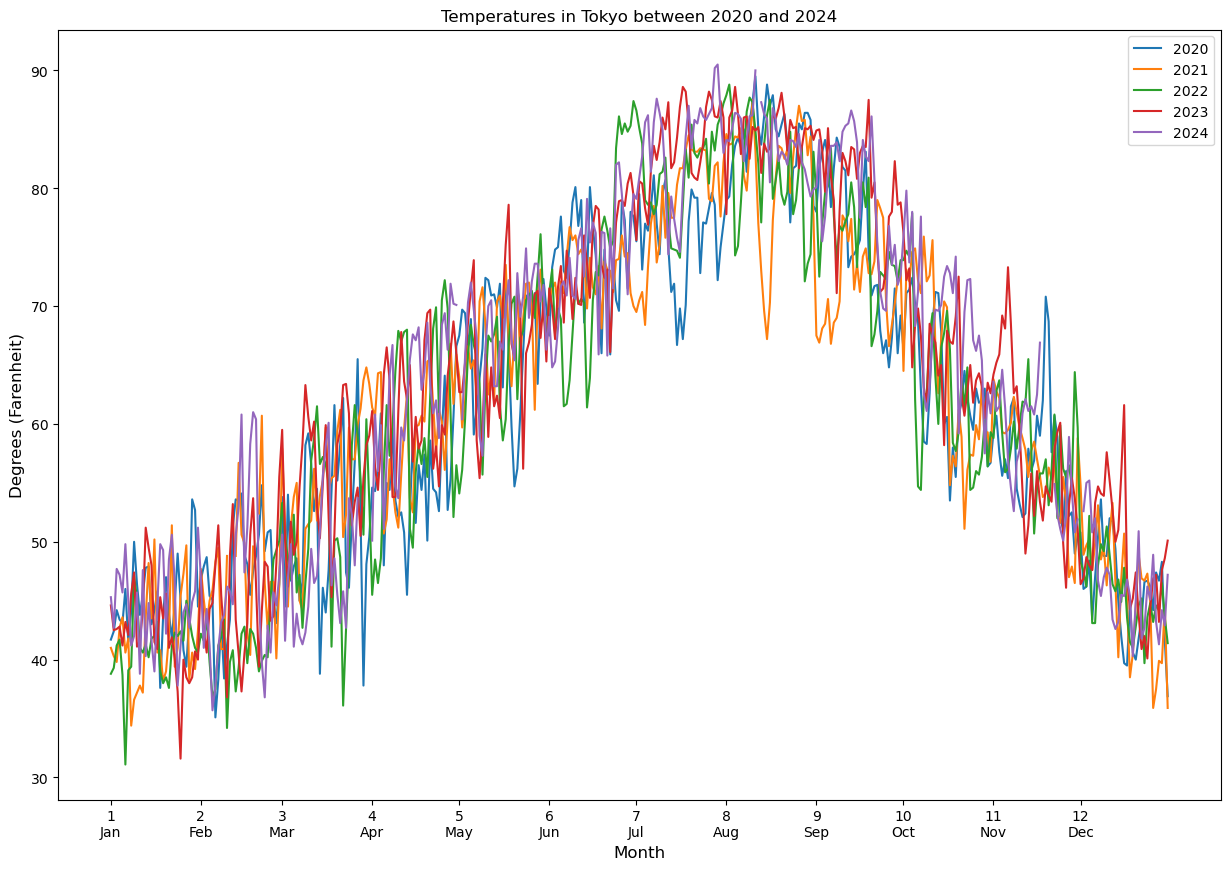

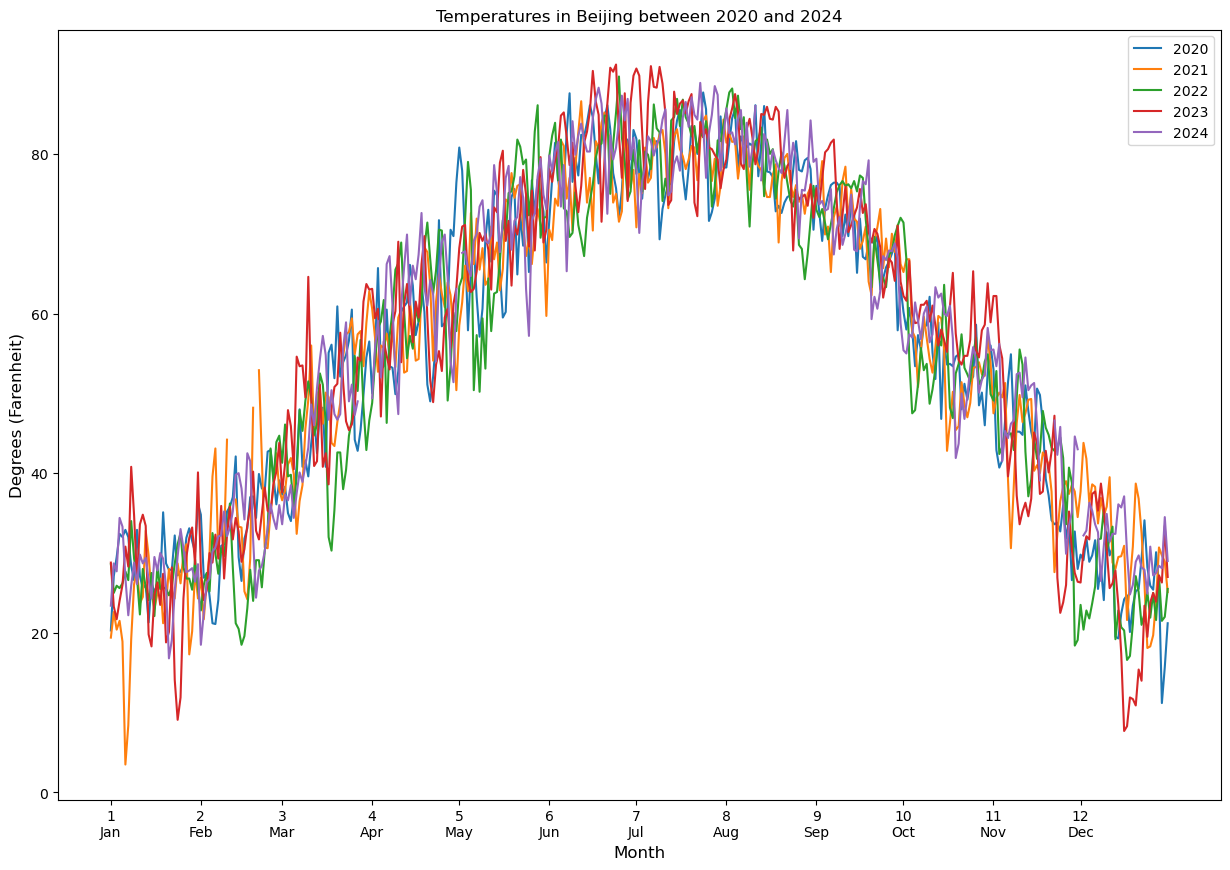

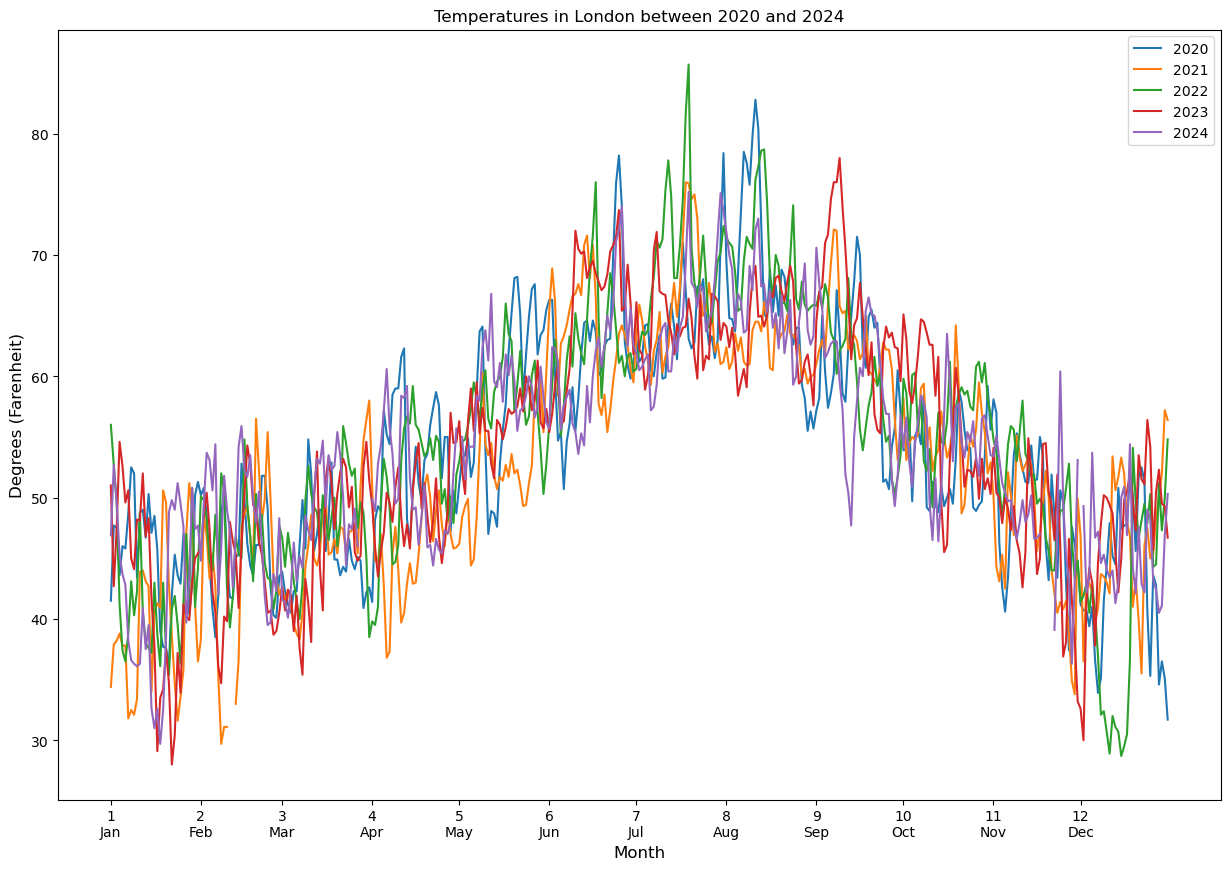

In [17]:
for i in np.arange(0, len(itterableLocations)):
    compareDateTempsPerYear(itterableLocations[i])

## Histogram Distributions

Now to make itterable versions of the Histogram plots for the ordinal series

In [103]:
# Global variable to give all numeric series in a dataframe, except FRSHHT (description below)

numericSeries = []

for i in np.arange(10, len(nyData.columns)):
    if not "class 'str'" in str(nyData.columns[i] + f"{type(nyData[f'{nyData.columns[i]}'].iloc[0])}")\
    and not "ATTRIBUTES" in nyData.columns[i]\
    and not nyData.columns[i] == "SLP"\
    and not nyData.columns[i] == "STP"\
    and not nyData.columns[i] == "FRSHTT":
        numericSeries.append(nyData.columns[i])

numericSeries # <-- gives all the numeric series without attribute ordinal/index values. 
              # Except for FRSHTT, which gives whether there was percipitation on a given day as a binary

              # This variable will act as a global variable for the histogram function.

['TEMP',
 'DEWP',
 'VISIB',
 'WDSP',
 'MXSPD',
 'GUST',
 'MAX',
 'MIN',
 'PRCP',
 'SNDP']

In [19]:
# HERE FOR REDUNDANCY:

# Concept, prints a series and the data type of the first element in it --> "Series, <class '___'>"
# Keeping it in for redundancy

# alist = []

# for i in np.arange(0, len(nyData.columns)):
#     if not "class 'str'" in str(nyData.columns[i])+ f", {type(nyData[f'{nyData.columns[i]}'].iloc[0])}":
#         alist.append(str(nyData.columns[i])+ f", {type(nyData[f'{nyData.columns[i]}'].iloc[0])}")

# alist # <-- prints all the ordinal and numeric values in the nydata dataframe, which should be the same across all datasets



### Histogram Function:

In [138]:
def histograms(df):
    locNumSeries = numericSeries

    verboseTitles = {'TEMP': "Temperature",
                     'DEWP': "Dew Point",
                     'SLP': "Sea Level Pressure",
                     'STP': "Station Pressure",
                     'VISIB': "Visibility Index",
                     'WDSP': "Windspeed",
                     'MXSPD': "Maximum Windspeed",
                     'GUST': "Gust",
                     'MAX': "Maximum Temperature",
                     'MIN': "Minimum Temperature",
                     'PRCP': "Precipitation Amount (0.1 inches)",
                     'SNDP': "Snow Depth Amount (0.1 inches)",
                     'FRSHTT': "The Existence of Frost, Rain or Drizzle, Ice or Snow Pellets, Hail, Thunder, Tornadoes or Funnel Clouds (1 = yes, 0 = no)"}

    # Printing a histogram of all numeric fields within a dataframe
    for i in np.arange(0, len(locNumSeries)):
        # instanciating min, max, span for itterables later.
        nmin = df[f'{locNumSeries[i]}'].min()
        nmax = df[f'{locNumSeries[i]}'].max()
        nspan = nmax-nmin
        nstep = (nmax-nmin)/10
        ticks = np.arange(nmin, nmax, nstep)
        for a in np.arange(0, len(ticks)): ticks[a] = round(ticks[a], 2)
        ticks = np.append(ticks, nmax)
        
        plt.figure(figsize = [15,10])
        plt.hist(df[f'{locNumSeries[i]}'], bins = 10)
        # distribution of [field name - verbose] in [city]
        plt.title(f" Distribution of {verboseTitles[f'{locNumSeries[i]}']} in {df.LOCATION.iloc[0]}")
        plt.xlabel("Quantities as Distribution Percentiles (10 bins)")
        plt.ylabel("Number of Instances")
        labels = []
        for j in np.arange(0,10):
            # Formatting Labels
            # int case
            if str(type(df[f'{locNumSeries[i]}'].iloc[0])) == "<class 'numpy.int64'>":
                labels.append(f"{" "*25}{ticks[j]} - {ticks[j]}\n{" "*25}{(j+1)*10}%")
                # I put 25 spaces before each line of the labels to "center" it without having to do complicated
            # float case
            elif str(type(df[f'{locNumSeries[i]}'].iloc[0])) == "<class 'numpy.float64'>":
                labels.append(f"{" "*25}{ticks[j]} - {round(ticks[j+1] - 0.01, 2)}\n{" "*25}{(j+1)*10}%")
                # I put 25 spaces before each line of the labels to "center" it without having to do complicated}%")
        labels.append("")
        plt.xticks(ticks, labels)
        plt.show()

    # Yes, flat is better than nested in Python. But this section is otherwise undecipherable if it was written flat
    # and would have become very complicated, this is much more readable and tracable, for me at least.

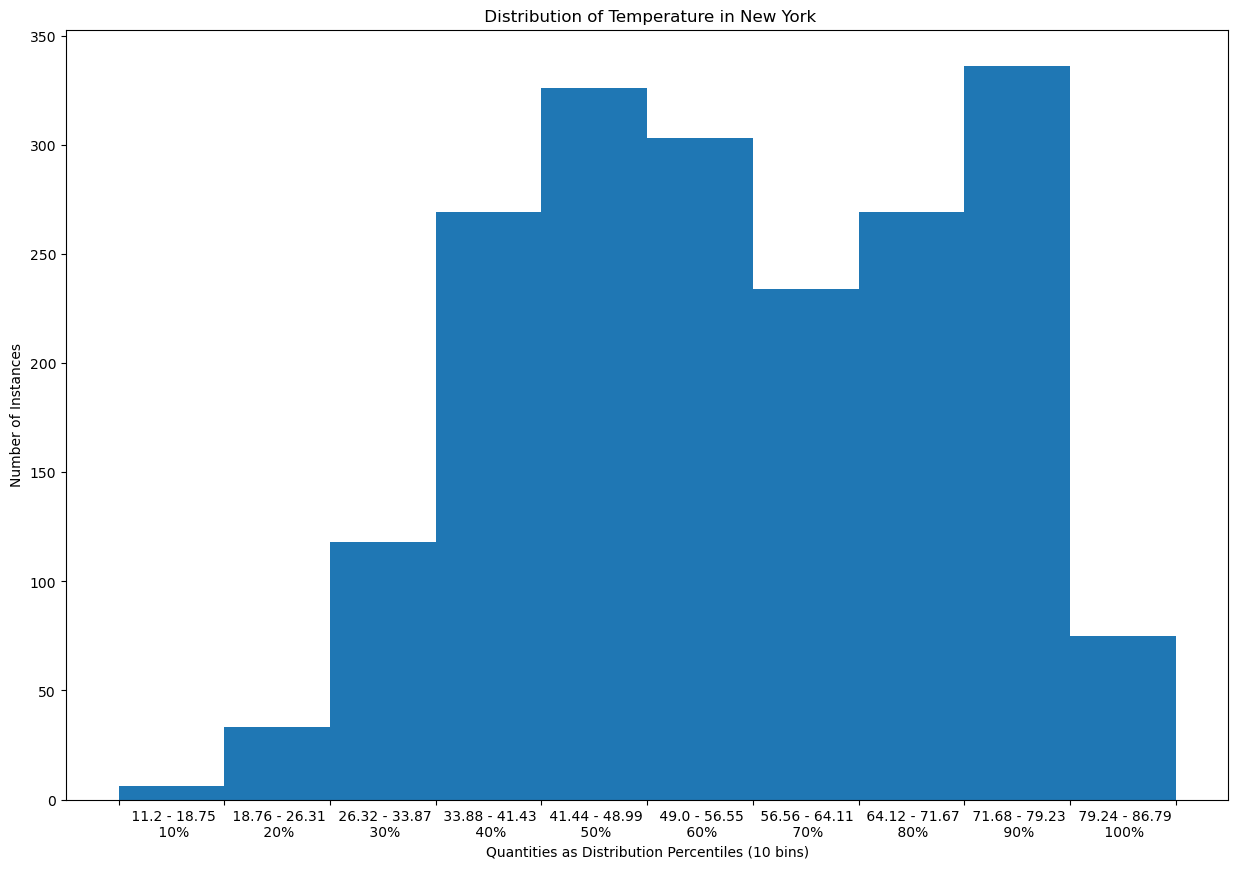

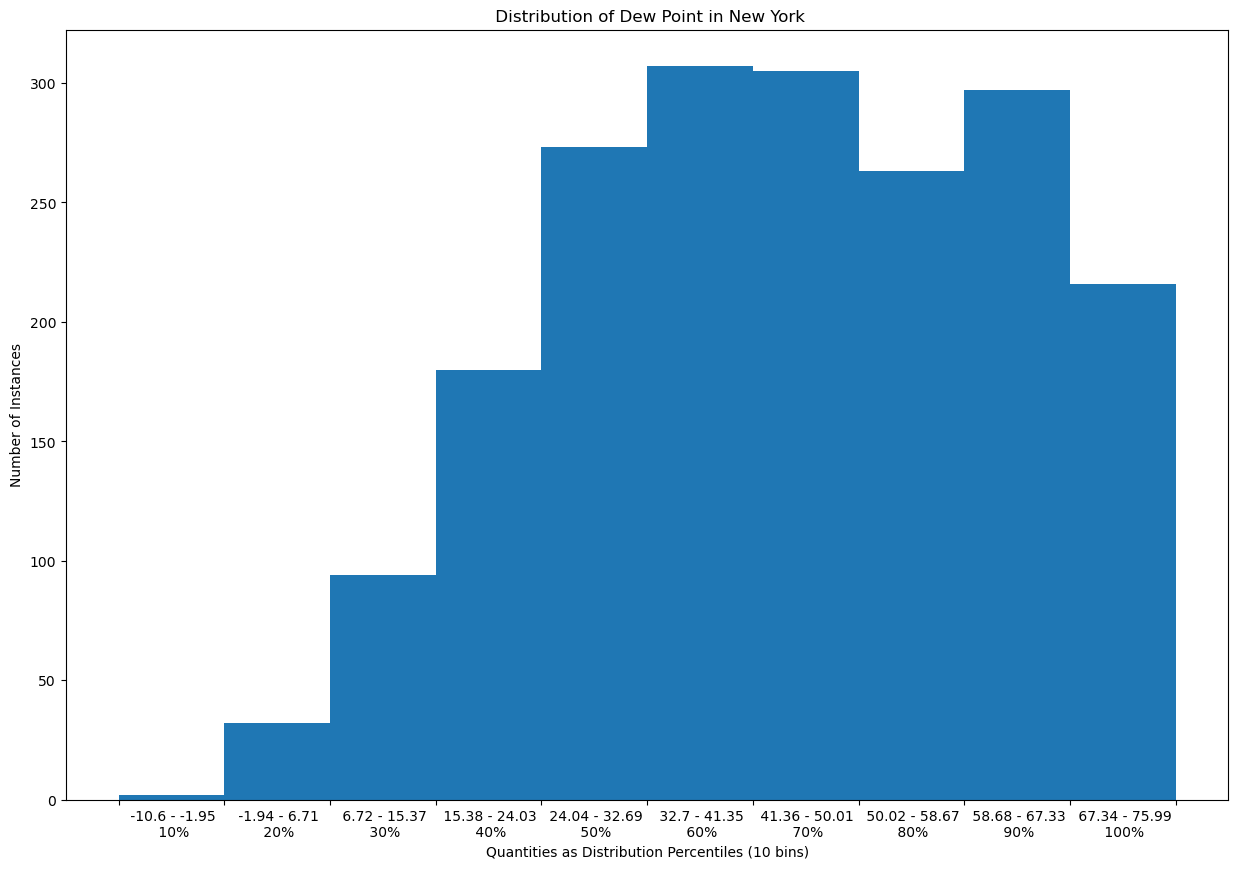

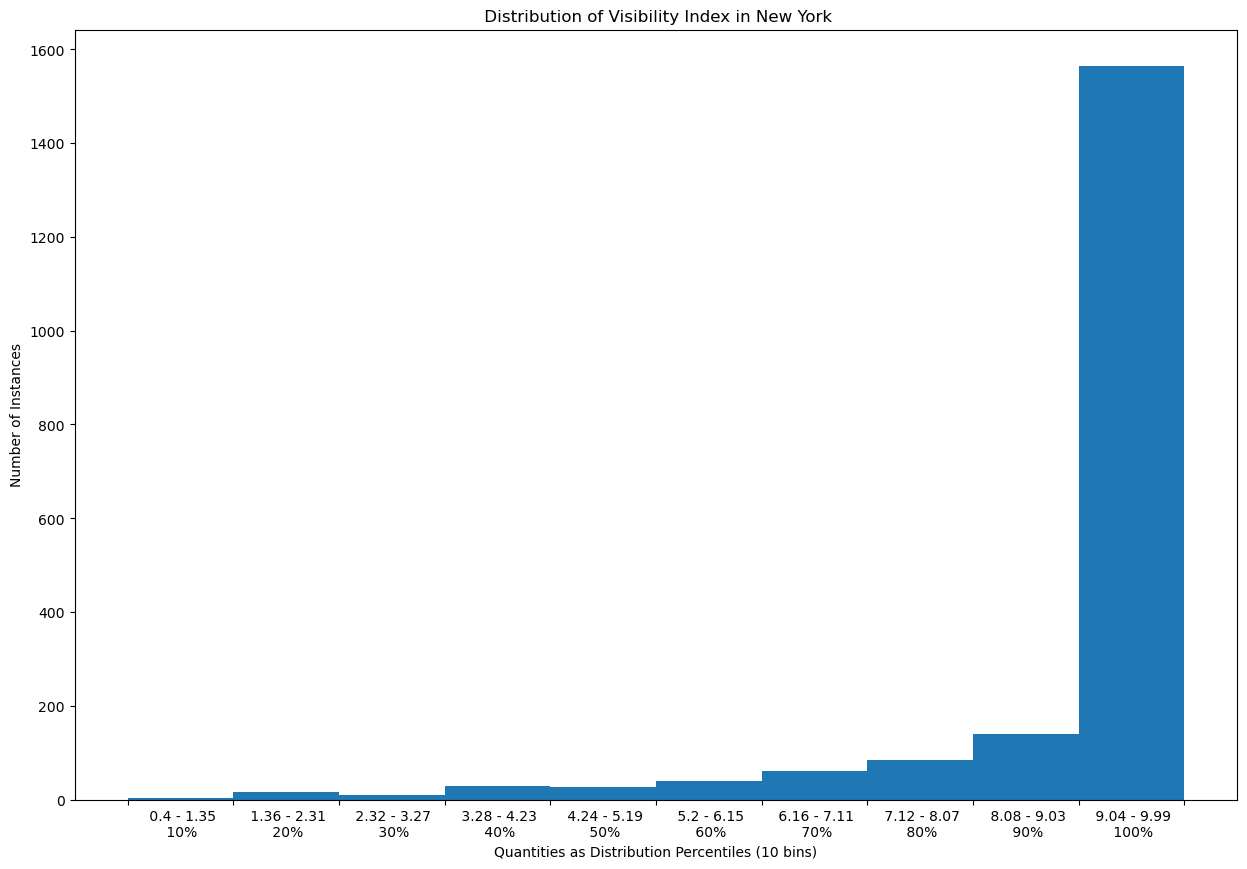

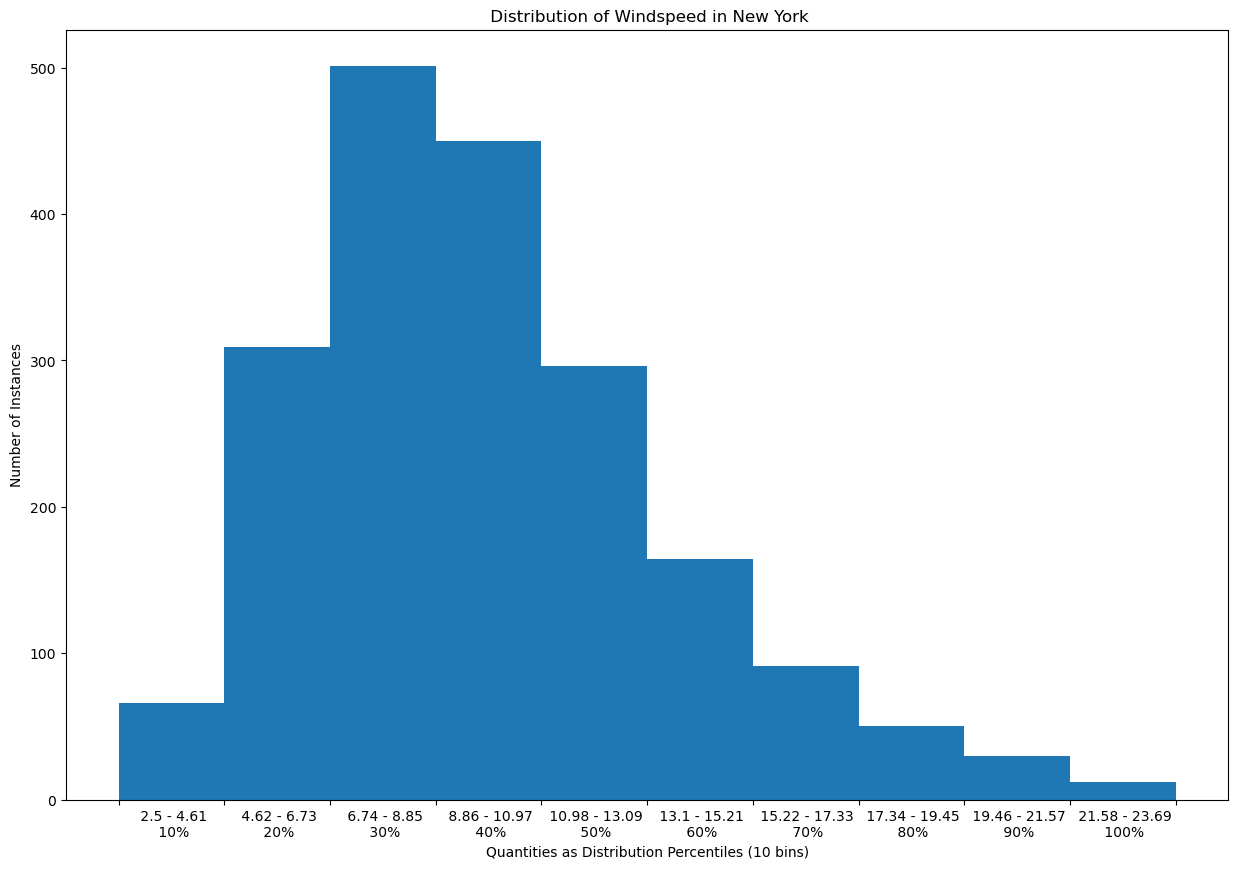

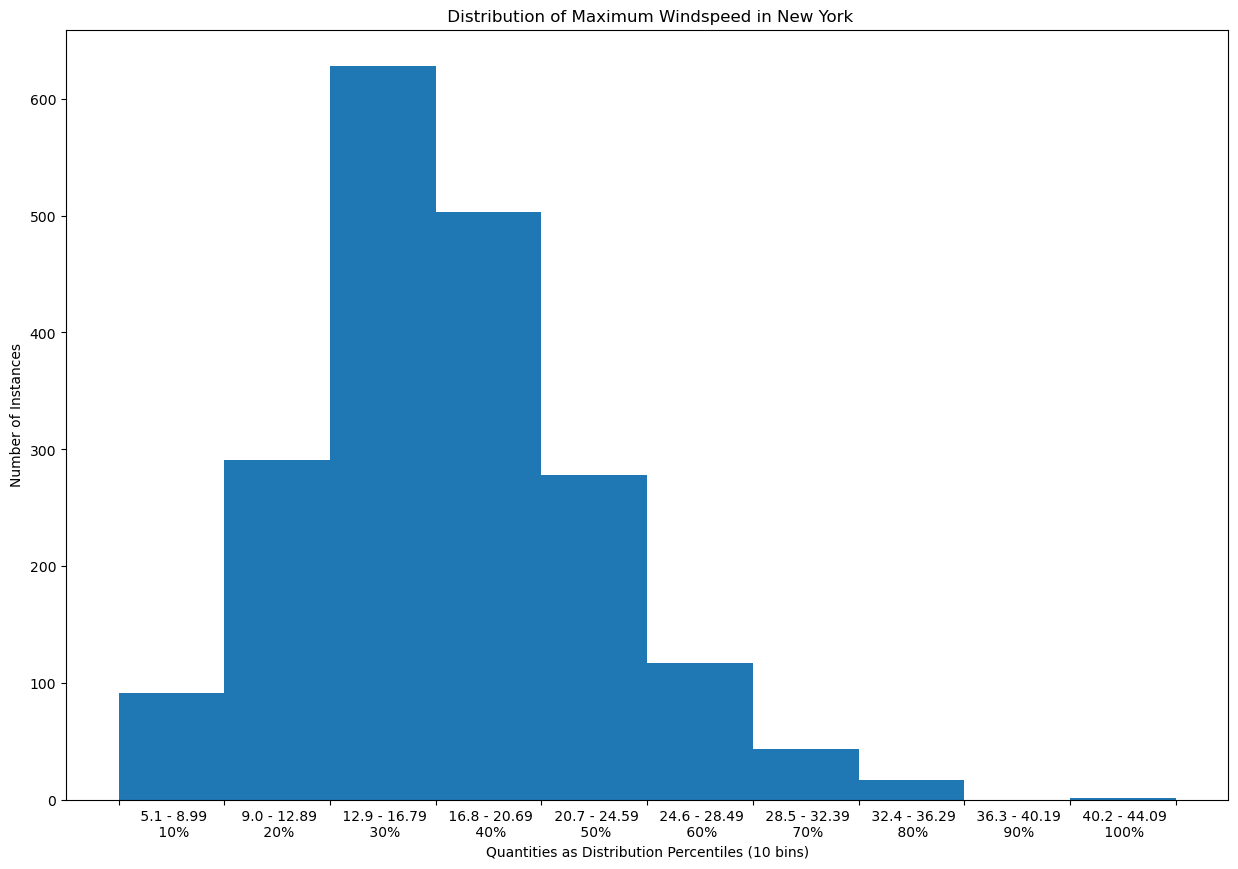

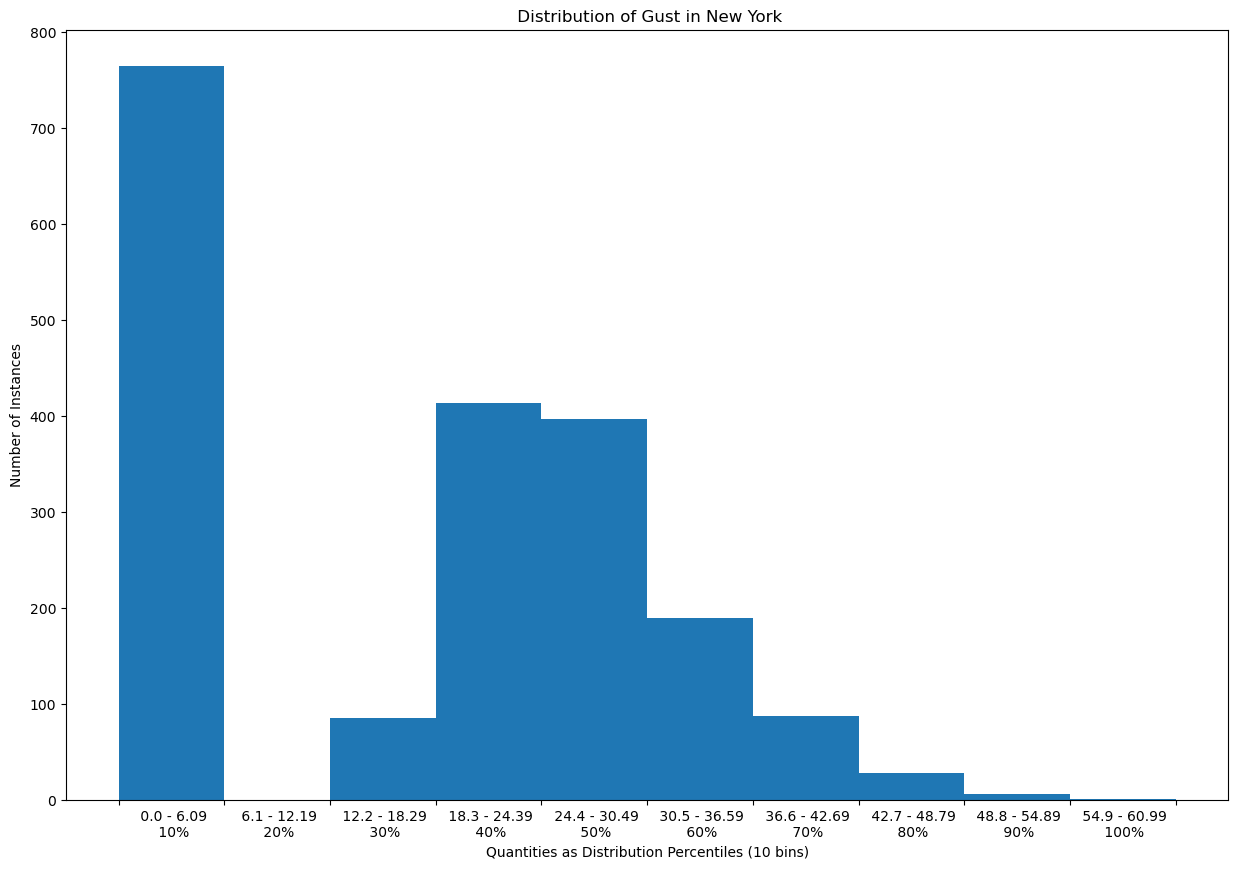

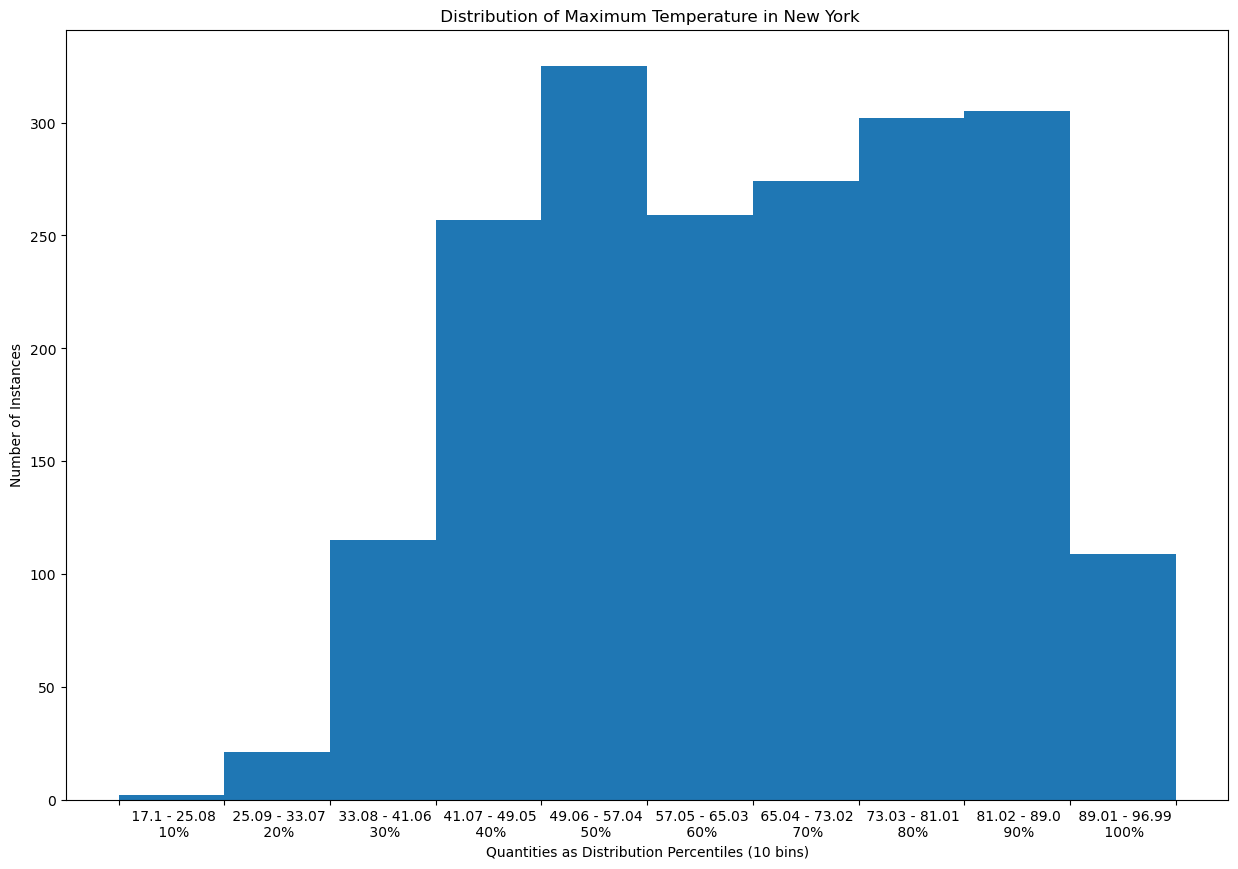

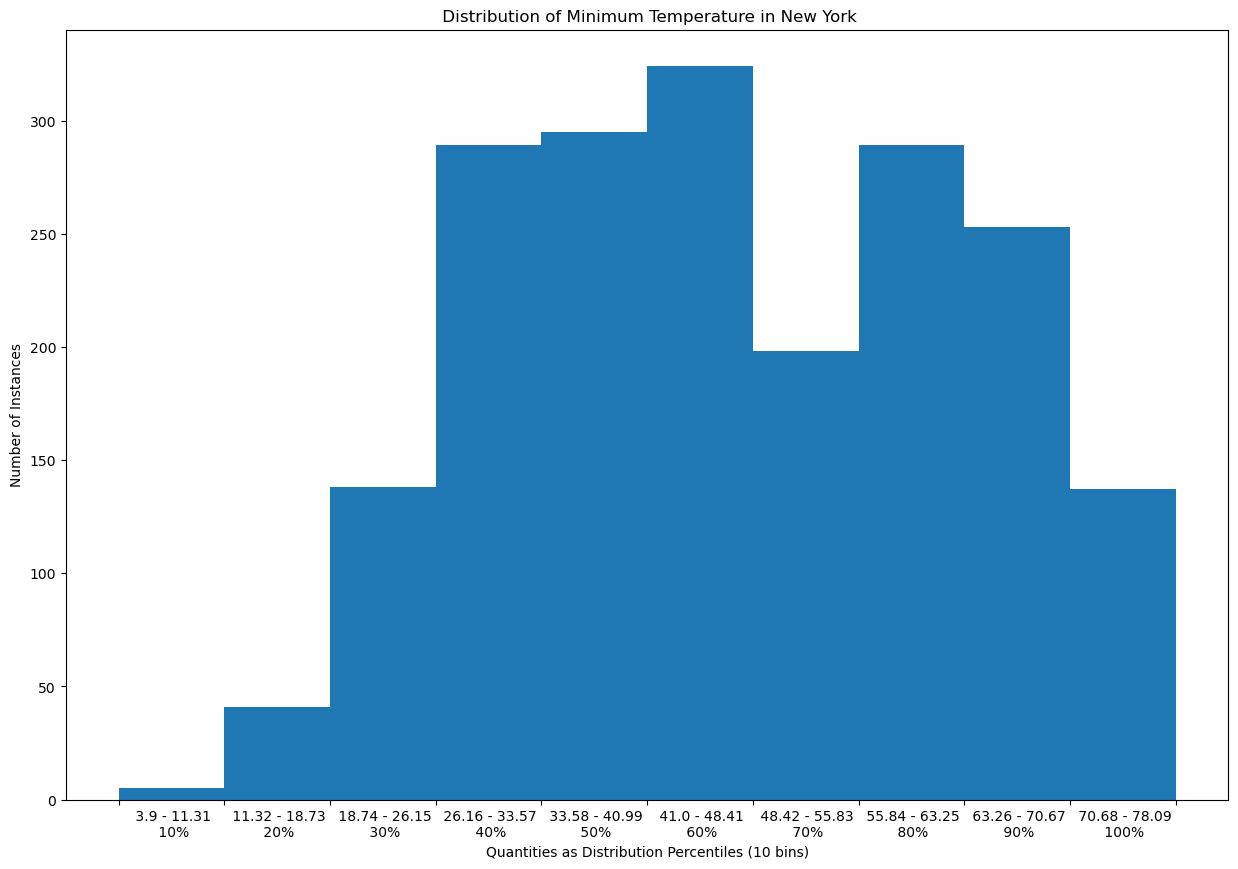

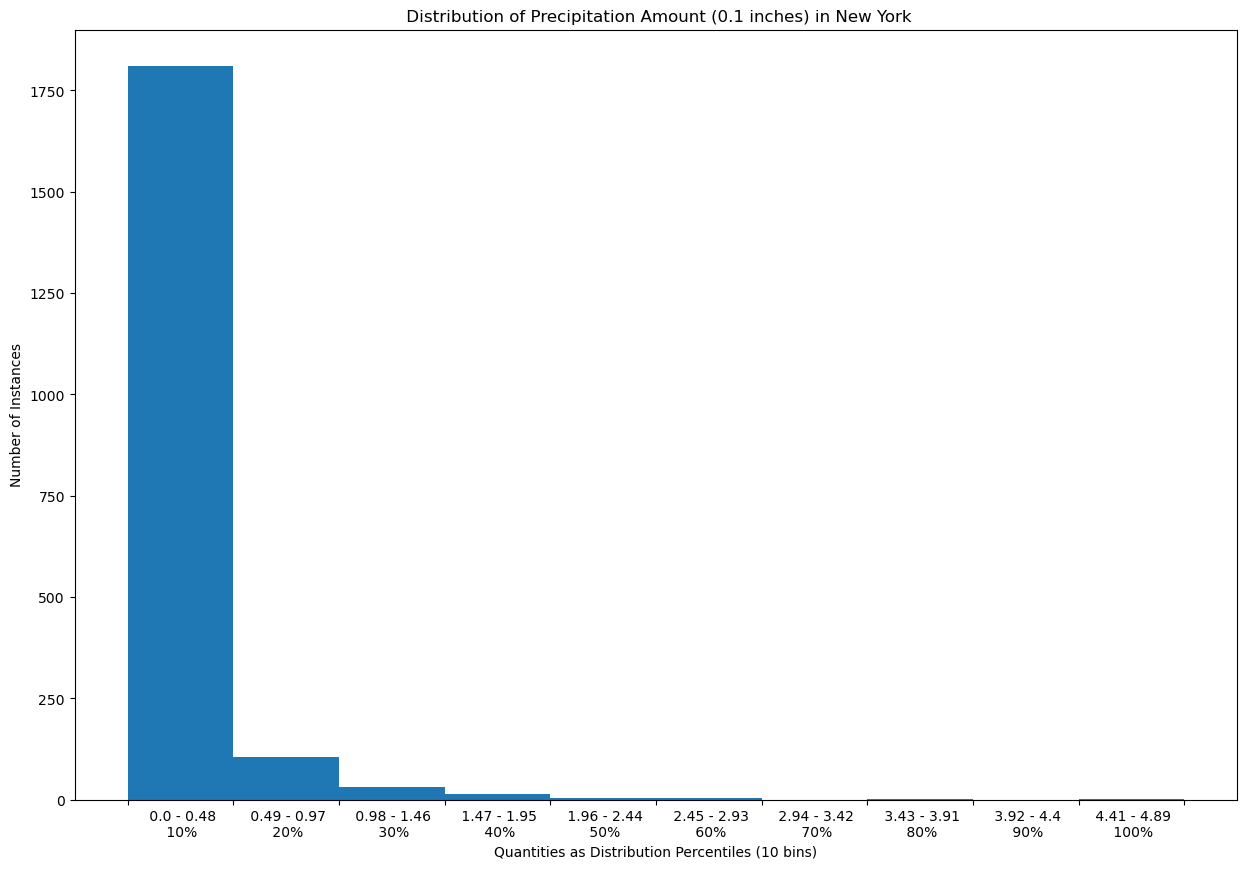

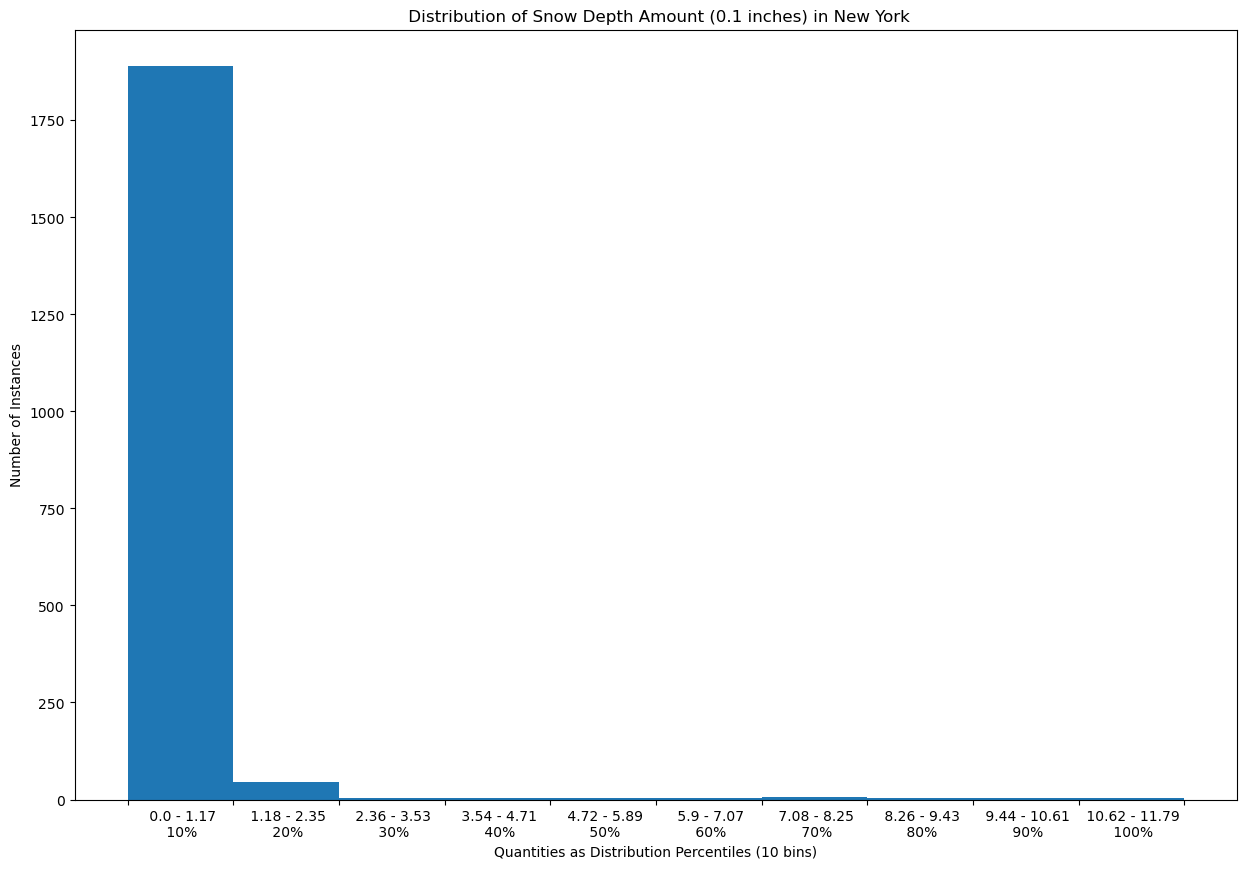

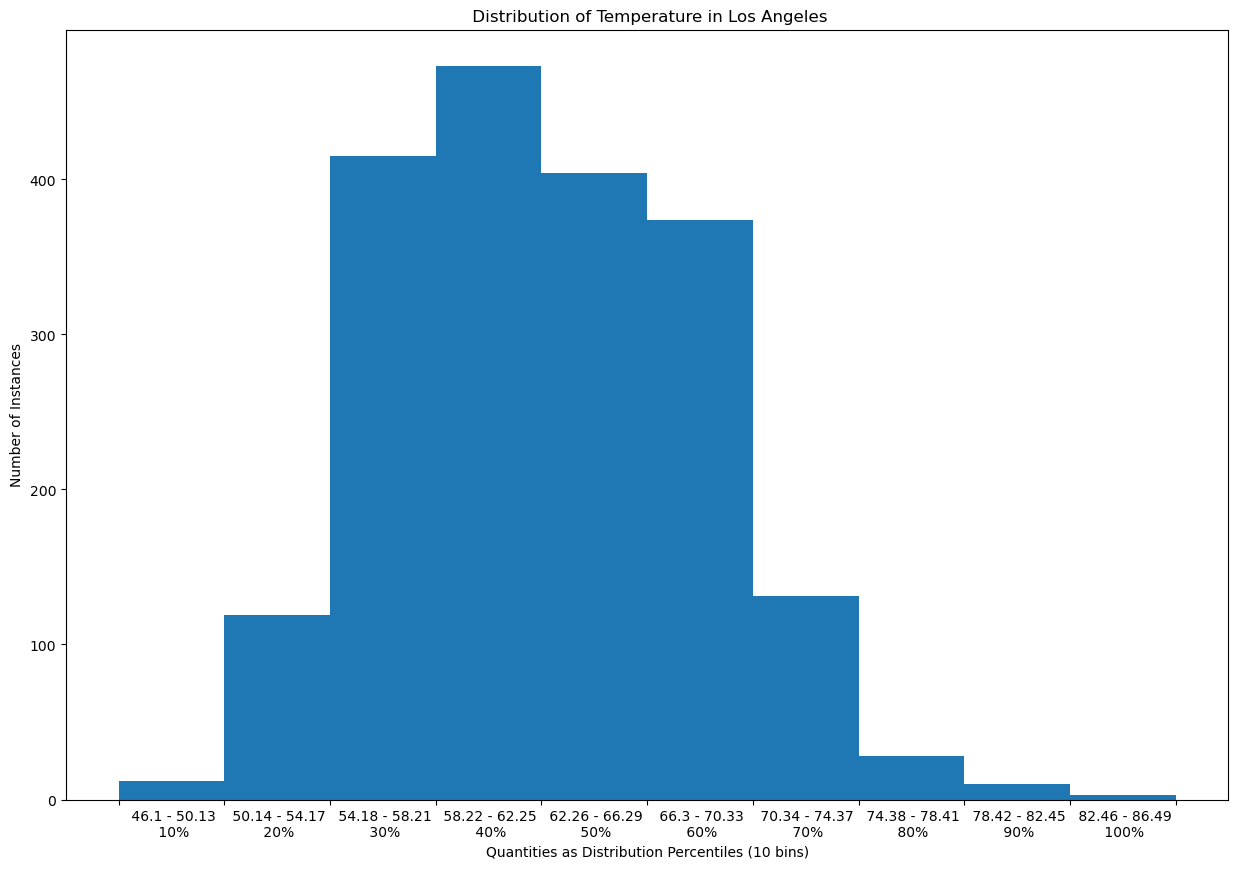

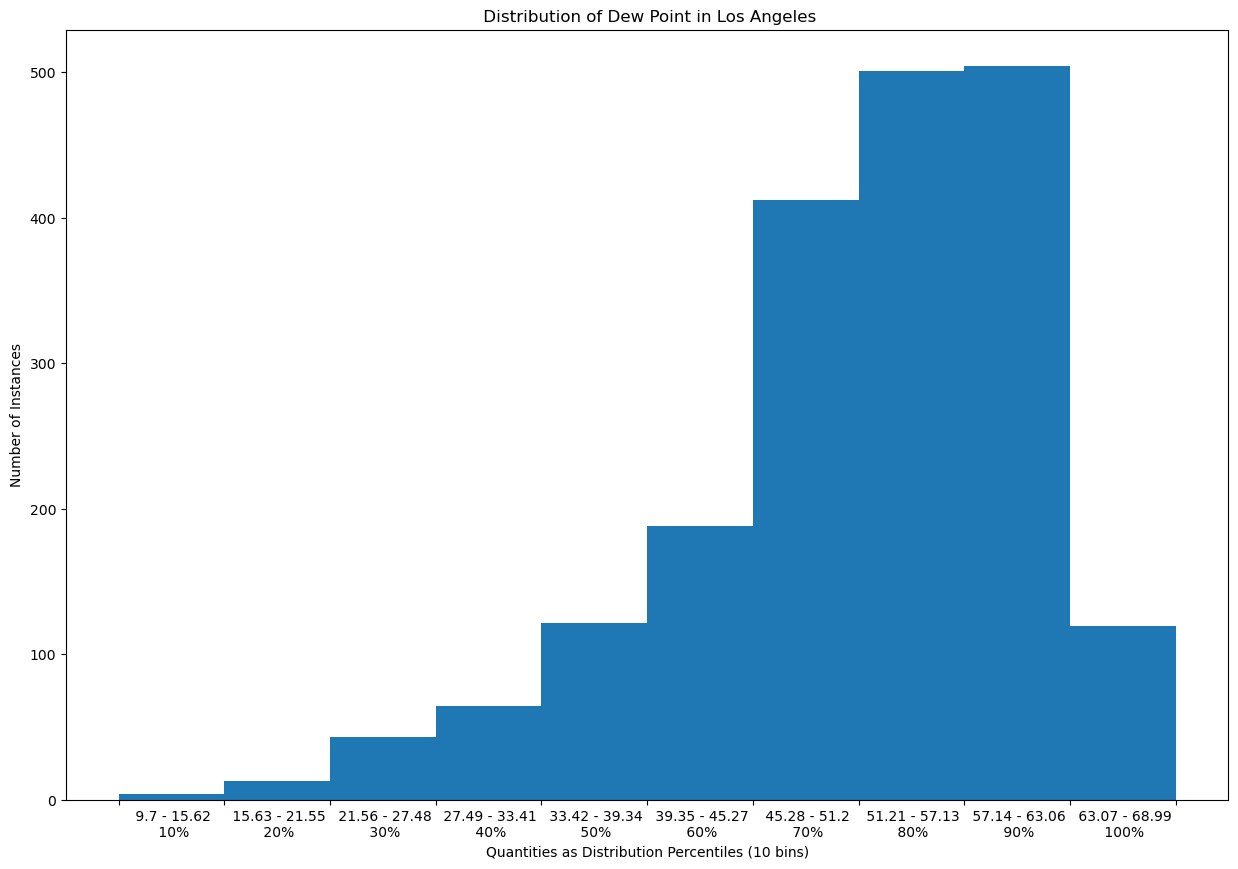

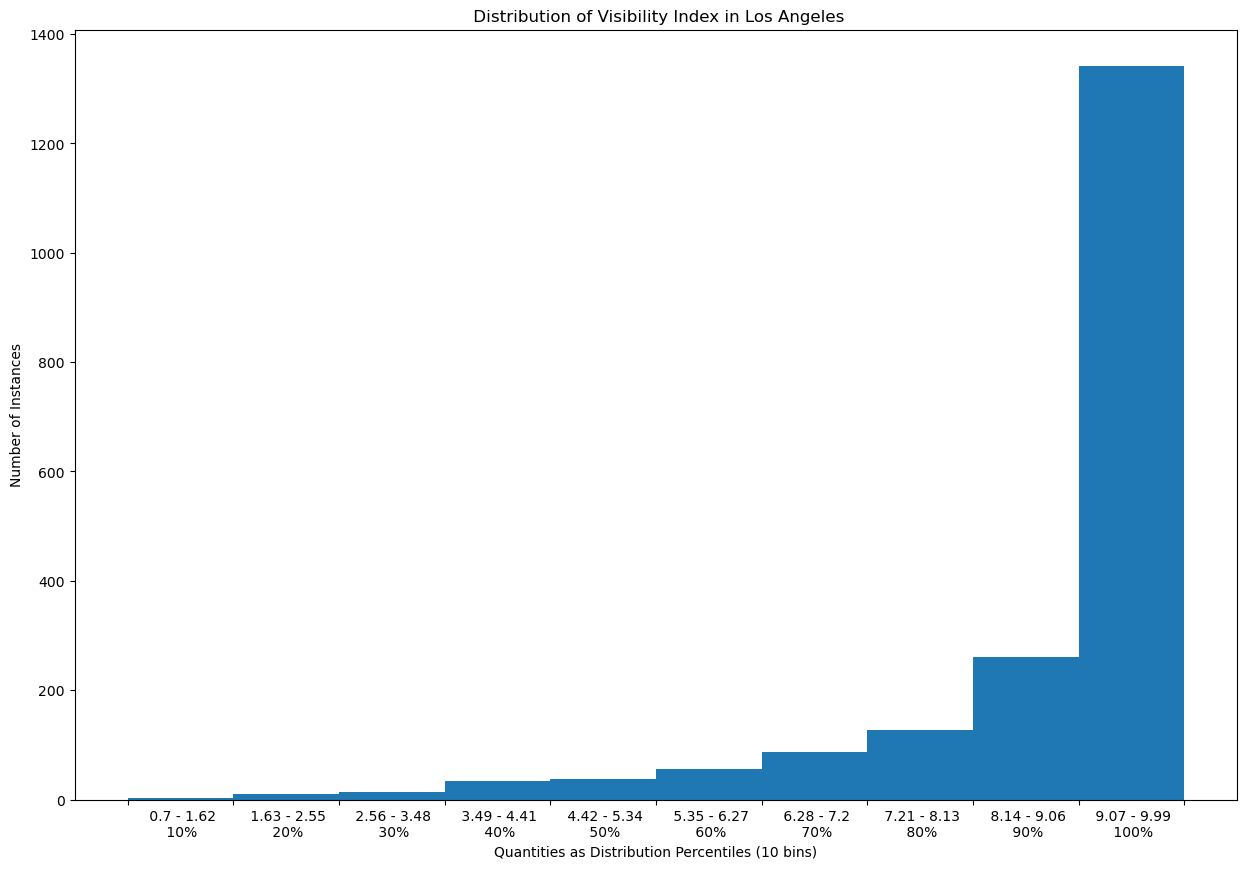

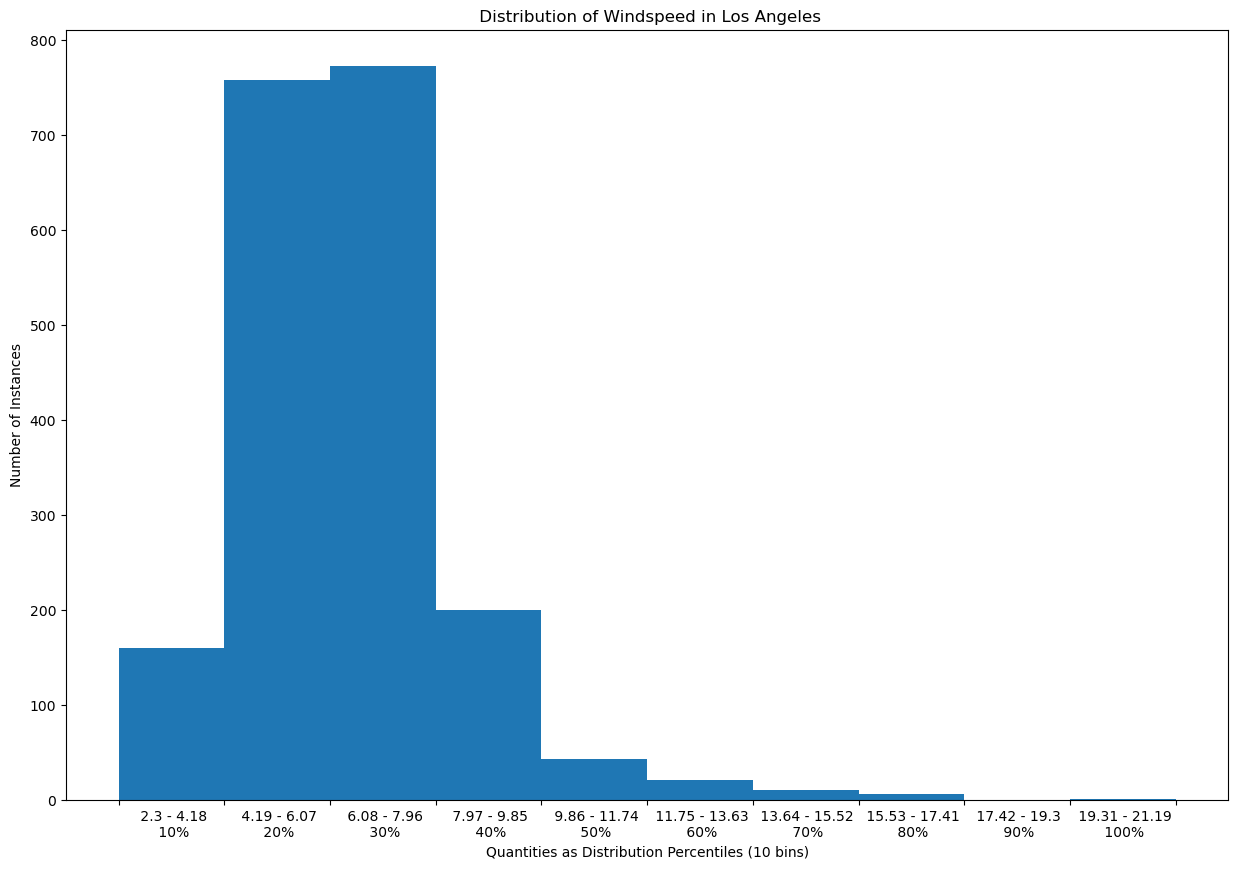

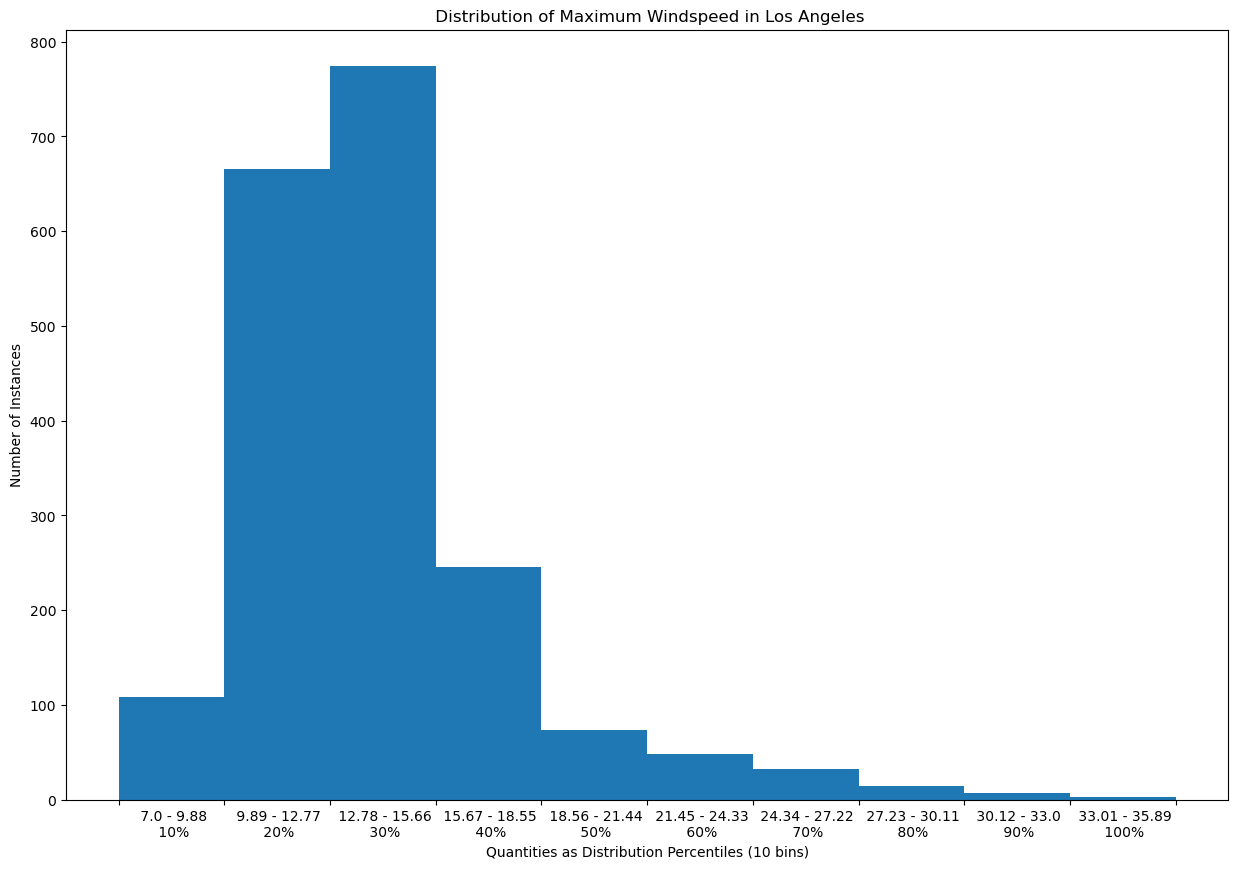

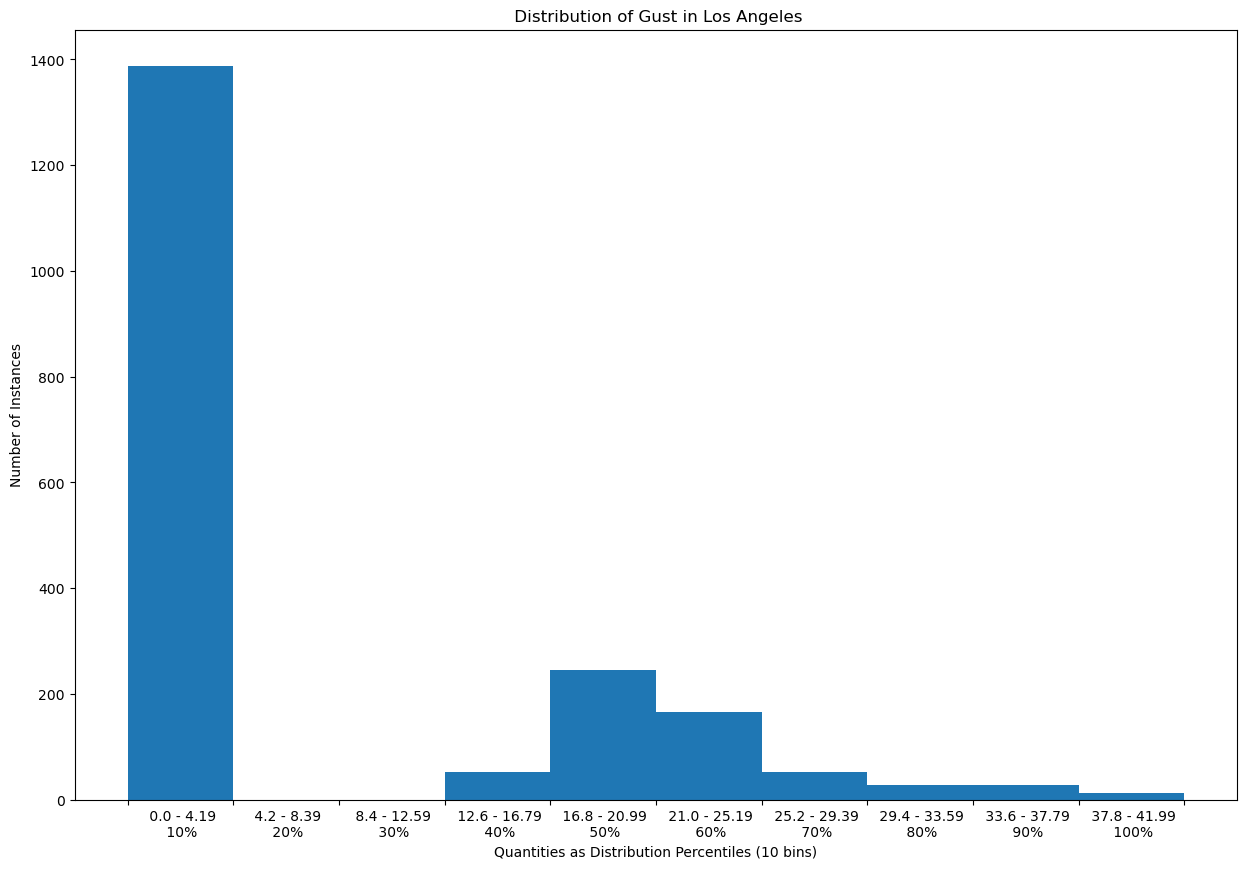

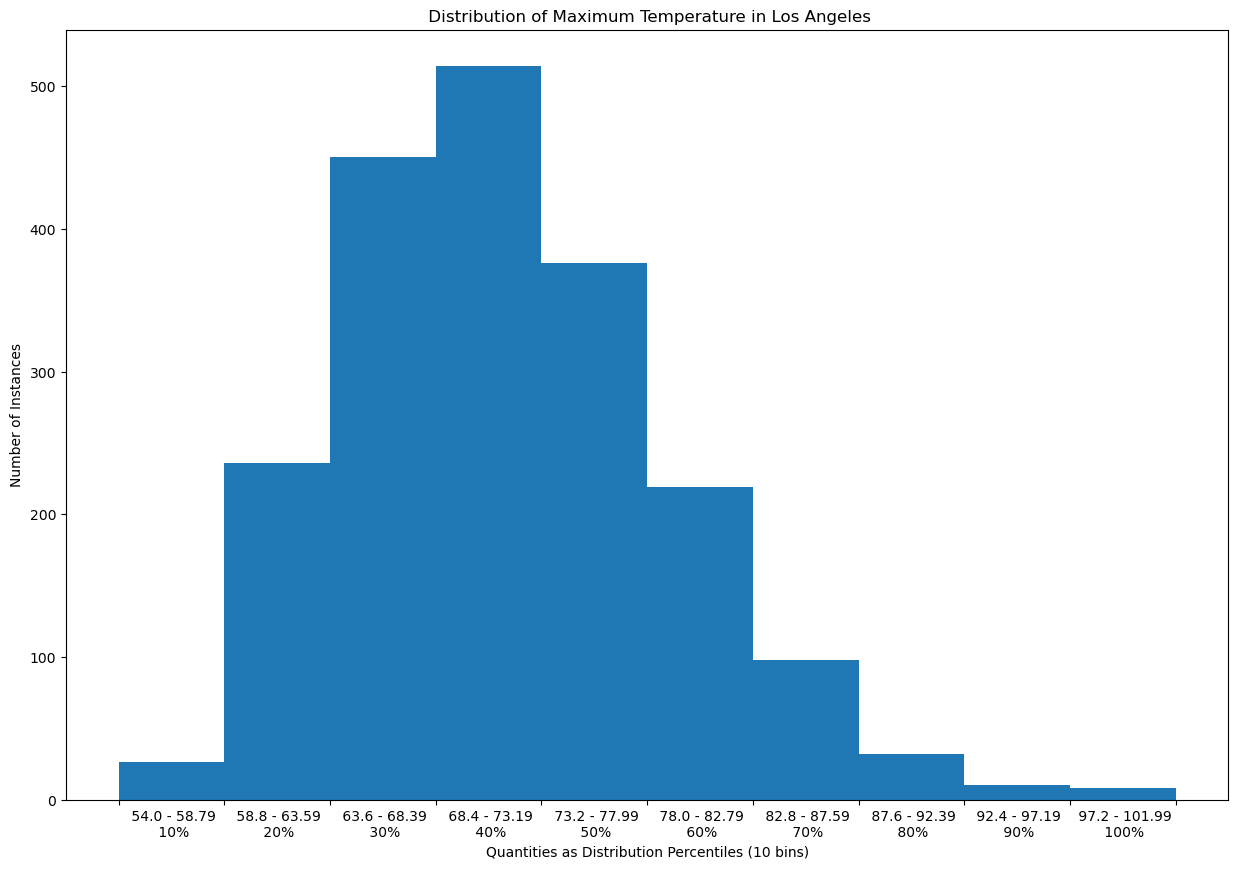

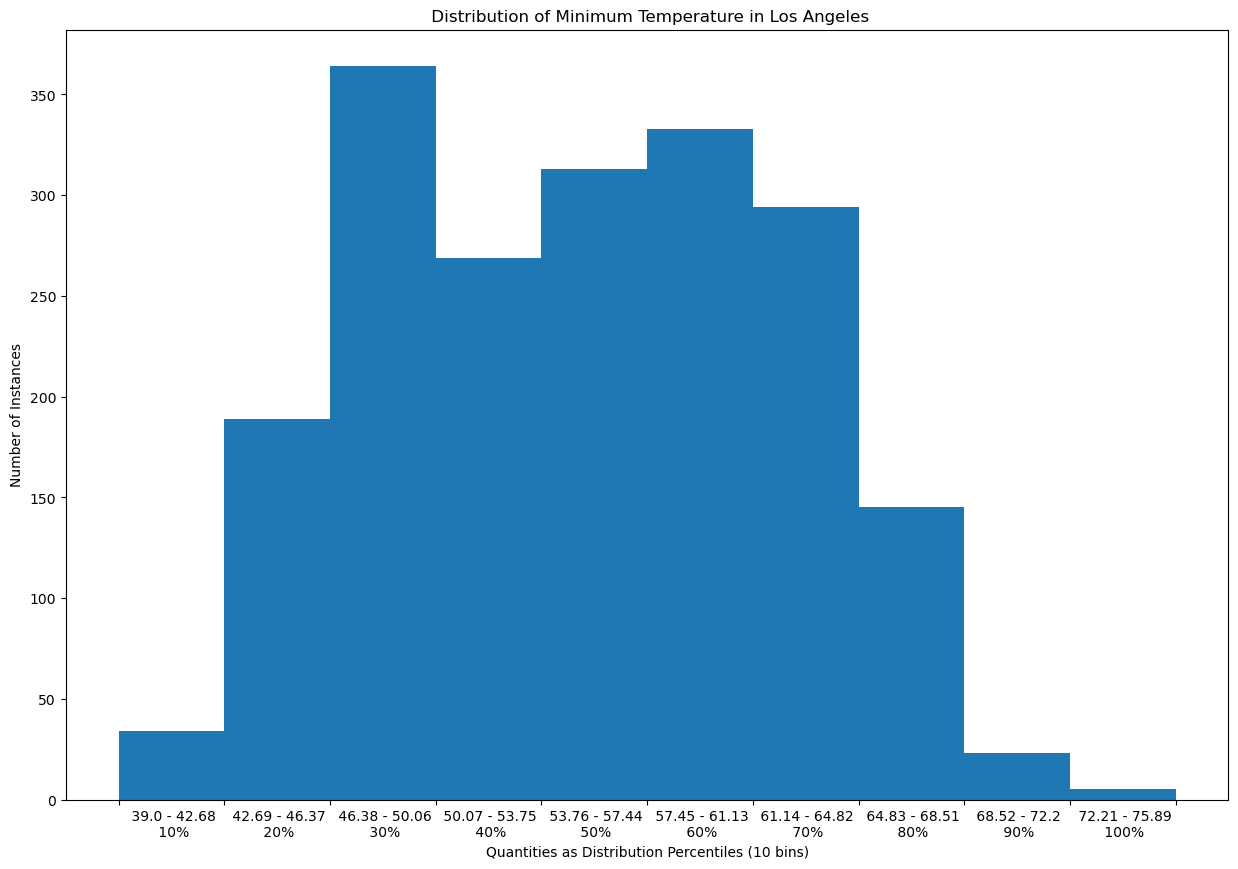

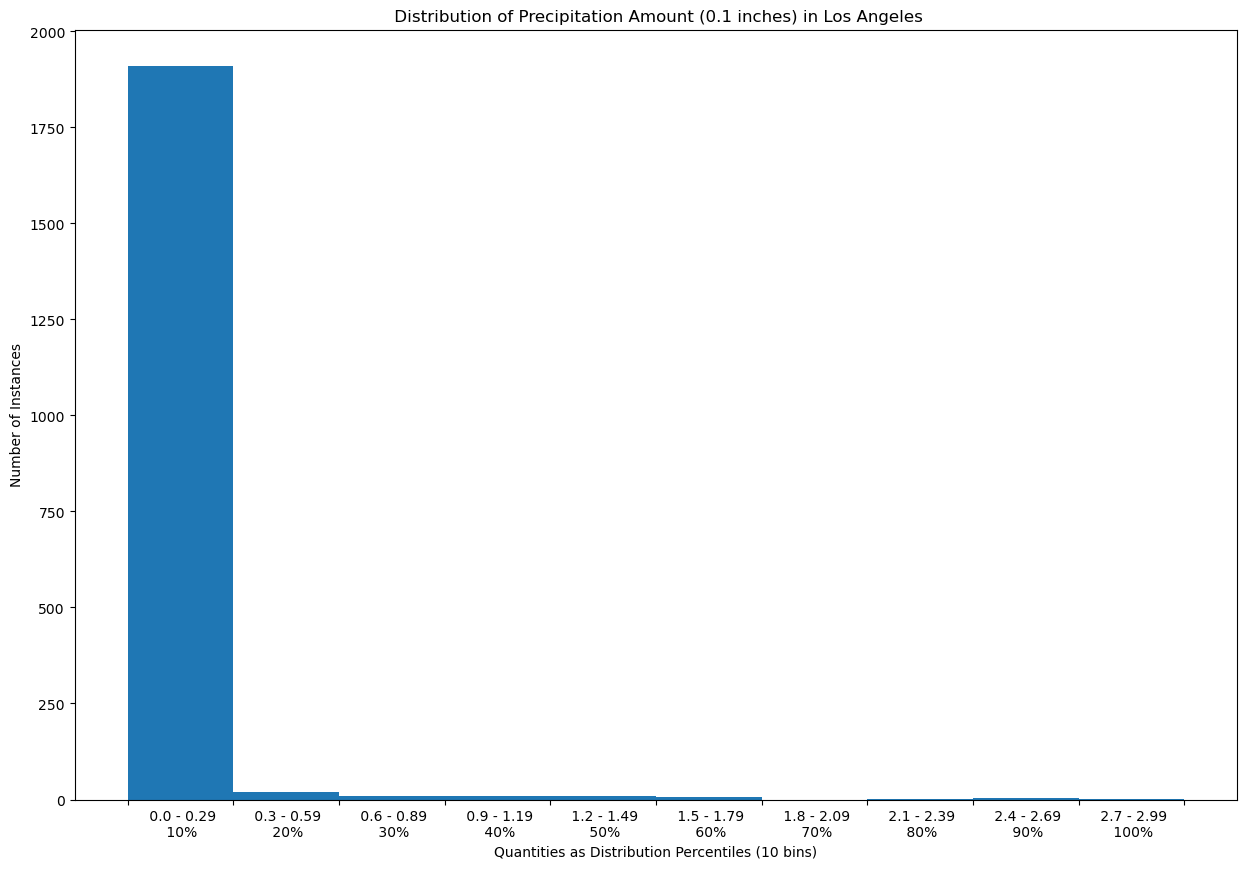

ZeroDivisionError: float division by zero

In [139]:
for i in np.arange(0, len(itterableLocations)):
    histograms(itterableLocations[i])

In [137]:
print((tokyoData.TEMP.max()-tokyoData.TEMP.min())/10)



5.9399999999999995
